In [ ]:
! pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 226 kB 14.7 MB/s 
     |████████████████████████████████| 62 kB 773 kB/s 
     |████████████████████████████████| 289 kB 43.1 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 103 kB 70.2 MB/s 
     |████████████████████████████████| 286 kB 47.6 MB/s 
     |████████████████████████████████| 1.0 MB 44.1 MB/s 
     |████████████████████████████████| 802 kB 37.7 MB/s 
     |████████████████████████████████| 41 kB 525 kB/s 
     |████████████████████████████████| 132 kB 66.0 MB/s 
     |████████████████████████████████| 60.2 MB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 63.0 MB/s 
     |████████████████████████████████| 280 kB 60.4 MB/s 
     |████████████████████████████████| 5.3 MB 55.6 MB/s 
     |████████████████████████████████|

In [ ]:
! pip install

In [ ]:
%cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [ ]:
%cd altegrad/

/content/drive/MyDrive/altegrad


In [ ]:
import csv
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Read sequences
sequences = list()
with open('sequences.txt', 'r') as f:
    for line in f:
        sequences.append(line[:-1])

# Split data into training and test sets
sequences_train = list()
sequences_test = list()
proteins_test = list()
y_train = list()
with open('graph_labels.txt', 'r') as f:
    for i,line in enumerate(f):
        t = line.split(',')
        if len(t[1][:-1]) == 0:
            proteins_test.append(t[0])
            sequences_test.append(sequences[i])
        else:
            sequences_train.append(sequences[i])
            y_train.append(int(t[1][:-1]))

In [ ]:
vec = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X_train = vec.fit_transform(sequences_train)
X_test = vec.transform(sequences_test)

In [ ]:
X_train.shape, X_test.shape

((4888, 8466), (1223, 8466))

In [ ]:
import scipy.sparse as sp
X = np.vstack((X_train.toarray(), X_test.toarray()))
X.shape

(6111, 8466)

In [ ]:
X_sparse = sp.csr_matrix(X)
from sklearn.decomposition import PCA, TruncatedSVD
# pca = PCA()
# pca.fit(X)
svd = TruncatedSVD(n_components=100)
svd.fit(X)

TruncatedSVD(n_components=100)

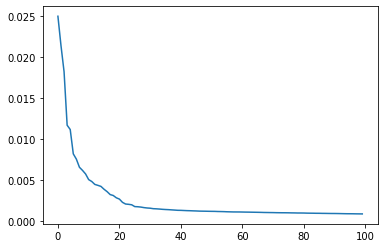

In [ ]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_ratio_)

In [ ]:
X_new = svd.transform(X)

In [ ]:
X_train_new,X_test_new = np.split(X_new,[X_train.shape[0]])

In [ ]:
X_train_new.shape, X_test_new.shape

((4888, 100), (1223, 100))

In [ ]:
import pandas as pd
df_train = pd.DataFrame(X_train_new)

In [ ]:
df_test = pd.DataFrame(X_test_new)

In [ ]:
df_train.columns = range(df_train.shape[1])

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.589564,-0.065158,-0.128475,-0.079919,-0.107561,0.010107,0.016062,-0.037816,-0.039134,0.052057,...,-0.016583,-0.009425,-0.015281,-0.009567,-0.030521,0.016348,0.014358,-0.015120,-0.037250,-0.007362
1,0.593361,0.141989,0.002289,-0.093620,-0.026722,0.143957,-0.001399,-0.155051,-0.083013,-0.049538,...,0.004404,0.020592,0.003446,-0.012571,-0.004908,0.007276,-0.021252,-0.012227,-0.022984,-0.013473
2,0.545473,0.010758,0.046792,0.098678,-0.158276,-0.061537,-0.079816,0.019441,-0.092617,0.032092,...,-0.028752,0.010332,0.048186,0.023139,-0.026765,0.013677,-0.011693,-0.010227,0.000880,0.018556
3,0.566464,-0.085501,-0.232329,0.165629,0.044607,0.029270,0.044037,0.054244,0.116100,0.232415,...,0.002173,-0.018971,0.007198,-0.012699,-0.023895,-0.016292,-0.026937,0.003117,0.000459,-0.019707
4,0.670683,0.152107,0.219302,0.138339,0.114656,-0.003701,-0.079613,0.007292,0.015300,0.024689,...,0.016613,0.023358,0.010510,0.003438,0.000355,-0.005403,0.013616,-0.001639,0.009857,0.044045


In [ ]:
np.unique(y_train,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([440,  50, 939,  60, 112, 625, 202,  74, 998,  57,  43, 305,  44,
         59, 548, 226,  60,  46]))

In [ ]:
df_train['class'] = y_train

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,0.589564,-0.065158,-0.128475,-0.079919,-0.107561,0.010107,0.016062,-0.037816,-0.039134,0.052057,...,-0.009425,-0.015281,-0.009567,-0.030521,0.016348,0.014358,-0.015120,-0.037250,-0.007362,8
1,0.593361,0.141989,0.002289,-0.093620,-0.026722,0.143957,-0.001399,-0.155051,-0.083013,-0.049538,...,0.020592,0.003446,-0.012571,-0.004908,0.007276,-0.021252,-0.012227,-0.022984,-0.013473,4
2,0.545473,0.010758,0.046792,0.098678,-0.158276,-0.061537,-0.079816,0.019441,-0.092617,0.032092,...,0.010332,0.048186,0.023139,-0.026765,0.013677,-0.011693,-0.010227,0.000880,0.018556,8
3,0.566464,-0.085501,-0.232329,0.165629,0.044607,0.029270,0.044037,0.054244,0.116100,0.232415,...,-0.018971,0.007198,-0.012699,-0.023895,-0.016292,-0.026937,0.003117,0.000459,-0.019707,8
4,0.670683,0.152107,0.219302,0.138339,0.114656,-0.003701,-0.079613,0.007292,0.015300,0.024689,...,0.023358,0.010510,0.003438,0.000355,-0.005403,0.013616,-0.001639,0.009857,0.044045,15


In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label='class', eval_metric='log_loss').fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20221212_225743/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221212_225743/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    4888
Train Data Columns: 100
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	First 10 (of 18) unique label values:  [8, 4, 15, 2, 5, 14, 6, 0, 7, 11]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 18
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:          

In [ ]:
predictor.leaderboard()

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -1.220885       0.200842  765.194100                0.001560           1.401763            2       True         14
1              CatBoost  -1.334743       0.019316  713.954813                0.019316         713.954813            1       True          8
2               XGBoost  -1.407001       0.047503   44.398861                0.047503          44.398861            1       True         11
3       NeuralNetFastAI  -1.511458       0.038547    5.399112                0.038547           5.399112            1       True          3
4            LightGBMXT  -1.520910       0.035714   39.460021                0.035714          39.460021            1       True          4
5              LightGBM  -1.553152       0.028155   64.017341                0.028155          64.017341            1       True          5
6         LightGBMLa

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-1.220885,0.200842,765.194100,0.001560,1.401763,2,True,14
1,CatBoost,-1.334743,0.019316,713.954813,0.019316,713.954813,1,True,8
2,XGBoost,-1.407001,0.047503,44.398861,0.047503,44.398861,1,True,11
3,NeuralNetFastAI,-1.511458,0.038547,5.399112,0.038547,5.399112,1,True,3
4,LightGBMXT,-1.520910,0.035714,39.460021,0.035714,39.460021,1,True,4
5,LightGBM,-1.553152,0.028155,64.017341,0.028155,64.017341,1,True,5
6,LightGBMLarge,-1.584544,0.068797,151.553799,0.068797,151.553799,1,True,13
7,RandomForestEntr,-1.598127,0.095928,48.878189,0.095928,48.878189,1,True,7
8,RandomForestGini,-1.616978,0.094932,9.305562,0.094932,9.305562,1,True,6
9,NeuralNetTorch,-1.625181,0.023234,8.842539,0.023234,8.842539,1,True,12


In [ ]:
predictor.refit_full(model='best', set_best_to_refit_full=True)

Fitting 1 L1 models ...
Fitting model: KNeighborsDist_FULL ...
	0.04s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: NeuralNetFastAI_FULL ...
	Stopping at the best epoch learned earlier - 4.
	1.33s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: CatBoost_FULL ...
	558.02s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: XGBoost_FULL ...
	19.37s	 = Training   runtime
Fitting model: WeightedEnsemble_L2_FULL | Skipping fit via cloning parent ...
	1.4s	 = Training   runtime
Updated best model to "WeightedEnsemble_L2_FULL" (Previously "WeightedEnsemble_L2"). AutoGluon will default to using "WeightedEnsemble_L2_FULL" for predict() and predict_proba().


{'KNeighborsDist': 'KNeighborsDist_FULL',
 'NeuralNetFastAI': 'NeuralNetFastAI_FULL',
 'CatBoost': 'CatBoost_FULL',
 'XGBoost': 'XGBoost_FULL',
 'WeightedEnsemble_L2': 'WeightedEnsemble_L2_FULL'}

In [ ]:
predict_proba = predictor.predict_proba(df_test)

In [ ]:
y_pred_proba = predict_proba.to_numpy()

In [ ]:
with open('sample_submission_log_loss_refit_full.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    lst = list()
    for i in range(18):
        lst.append('class'+str(i))
    lst.insert(0, "name")
    writer.writerow(lst)
    for i, protein in enumerate(proteins_test):
        lst = y_pred_proba[i,:].tolist()
        lst.insert(0, protein)
        writer.writerow(lst)